### Text Classification using Keras Hub - Advanced Level

This notebook demonstrates an advanced-level text classification task using the Yelp Polarity dataset.  
It involves building a deep learning model using Keras with a custom architecture for binary sentiment classification.  


In [ ]:
import tensorflow as tf
import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

### Load the Yelp Polarity Reviews dataset  
Downloads and loads the Yelp Polarity dataset for binary sentiment classification.  
The dataset consists of positive and negative reviews labeled accordingly.


In [ ]:
# Load an advanced text dataset (Yelp Polarity Reviews)
dataset, dataset_info = tfds.load("yelp_polarity_reviews", as_supervised=True, with_info=True)
data_train, data_test = dataset["train"].batch(128), dataset["test"].batch(128)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/incomplete.ON205F_0.2.0/yelp_polarity_reviews-train.…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/yelp_polarity_reviews/incomplete.ON205F_0.2.0/yelp_polarity_reviews-test.t…

Dataset yelp_polarity_reviews downloaded and prepared to /root/tensorflow_datasets/yelp_polarity_reviews/0.2.0. Subsequent calls will reuse this data.


### Load text vectorization layer from Keras  
Brings in the TextVectorization layer which will transform raw text into numeric sequences.  
This is a key step in preparing textual data for training.


In [ ]:
# Load text vectorization
text_vectorizer = keras.layers.TextVectorization(max_tokens=30000, output_mode="int", output_sequence_length=300)

In [ ]:
# Prepare text vectorization
text_only_train = data_train.map(lambda x, y: x)
text_vectorizer.adapt(text_only_train)

### Build a deep text classification model  
Constructs a custom model with embedding, dropout, bidirectional LSTM, and dense layers.  
Designed to capture sequential patterns and improve sentiment classification performance.


In [ ]:
# Build the model
inputs = keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = keras.layers.Embedding(input_dim=30000, output_dim=64)(x)
x = keras.layers.Bidirectional(keras.layers.LSTM(64, return_sequences=True))(x)
x = keras.layers.GlobalMaxPooling1D()(x)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dense(1, activation="sigmoid")(x)  # Binary classification
model = keras.Model(inputs, x)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# Display sample text from dataset
sample_text, sample_label = next(iter(data_train.take(1)))
for i in range(3):  # Show 3 text samples
    print(f"Review {i+1}: {sample_text[i].numpy().decode('utf-8')}")
    print(f"Sentiment: {'Positive' if sample_label[i].numpy() == 1 else 'Negative'}\n")

Review 1: The Groovy P. and I ventured to his old stomping grounds for lunch today.  The '5 and Diner' on 16th St and Colter left me with little to ask for.  Before coming here I had a preconceived notion that 5 & Diners were dirty and nasty. Not the case at all.\n\nWe walk in and let the waitress know we want to sit outside (since it's so nice and they had misters).  We get two different servers bringing us stuff (talk about service) and I ask the one waitress for recommendations.  I didn't listen to her, of course, and ordered the Southwestern Burger w/ coleslaw and started with a nice stack of rings.\n\nThe Onion Rings were perfectly cooked.  They looked like they were prepackaged, but they were very crispy and I could actually bite through the onion without pulling the entire thing out (don't you hate that?!!!)\n\nThe Southwestern Burger was order Medium Rare and was cooked accordingly.  Soft, juicy, and pink with a nice crispy browned outer layer that can only be achieved on a wel

In [ ]:
# Train the model
history = model.fit(data_train, validation_data=data_test, epochs=8)

Epoch 1/8
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 189s 42ms/step - accuracy: 0.8950 - loss: 0.2391 - val_accuracy: 0.9521 - val_loss: 0.1249
Epoch 2/8
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 181s 41ms/step - accuracy: 0.9568 - loss: 0.1140 - val_accuracy: 0.9549 - val_loss: 0.1219
Epoch 3/8
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 202s 41ms/step - accuracy: 0.9695 - loss: 0.0852 - val_accuracy: 0.9528 - val_loss: 0.1347
Epoch 4/8
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 180s 41ms/step - accuracy: 0.9789 - loss: 0.0614 - val_accuracy: 0.9528 - val_loss: 0.1522
Epoch 5/8
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 179s 41ms/step - accuracy: 0.9843 - loss: 0.0463 - val_accuracy: 0.9521 - val_loss: 0.1653
Epoch 6/8
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 203s 41ms/step - accuracy: 0.9881 - loss: 0.0353 - val_accuracy: 0.9481 - val_loss: 0.2061
Epoch 7/8
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 184s 42ms/step - accuracy: 0.9911 - loss: 0.0268 - val_accuracy: 0.9503 - val_loss: 0.2175
Epoch 8/8
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 185s 42ms/step - accuracy: 0.9927 -

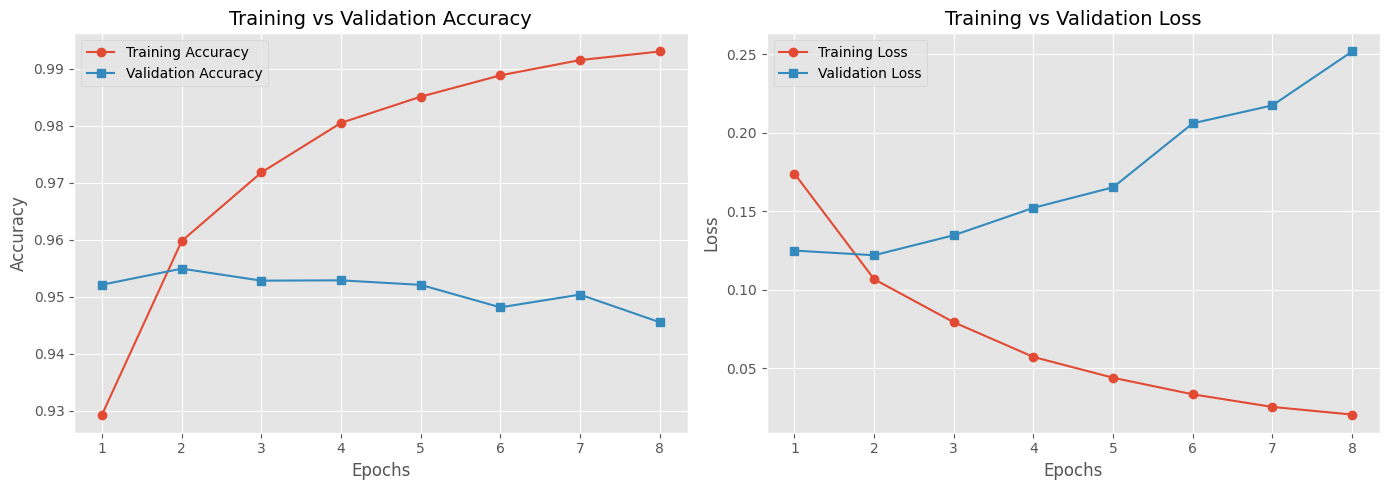

In [ ]:
import matplotlib.pyplot as plt

def plot_advanced_text_training_history(history):
    acc = history.history.get('accuracy', [])
    val_acc = history.history.get('val_accuracy', [])
    loss = history.history.get('loss', [])
    val_loss = history.history.get('val_loss', [])
    epochs = range(1, len(acc) + 1)

    plt.style.use('ggplot')

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Accuracy Plot
    axes[0].plot(epochs, acc, label='Training Accuracy', marker='o')
    if val_acc:
        axes[0].plot(epochs, val_acc, label='Validation Accuracy', marker='s')
    axes[0].set_title('Training vs Validation Accuracy', fontsize=14)
    axes[0].set_xlabel('Epochs', fontsize=12)
    axes[0].set_ylabel('Accuracy', fontsize=12)
    axes[0].legend()
    axes[0].grid(True)

    # Loss Plot
    axes[1].plot(epochs, loss, label='Training Loss', marker='o')
    if val_loss:
        axes[1].plot(epochs, val_loss, label='Validation Loss', marker='s')
    axes[1].set_title('Training vs Validation Loss', fontsize=14)
    axes[1].set_xlabel('Epochs', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


plot_advanced_text_training_history(history)
